In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入 Tensorflow, 其實我們沒用到, 玩爽的而已。

In [3]:
import tensorflow as tf

### 1. 讀入 MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2. 欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

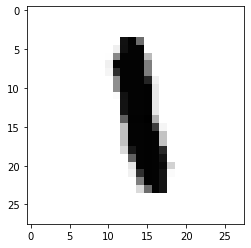

In [11]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
np.array([3, 78, 95, 99])/100

array([0.03, 0.78, 0.95, 0.99])

現在才是我們真的要做的, 這個動作叫 "normalization"。

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
28*28

784

In [16]:
x_train = x_train.reshape(60000, 784)

In [17]:
x_test = x_test.reshape(10000, 784)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_test = to_categorical(y_test, 10)

In [21]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
model = Sequential()

In [24]:
model.add(Dense(87, input_dim=784, activation='relu'))

In [25]:
model.add(Dense(87, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

### 4. 組裝我們的神經網路

In [27]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [29]:
784*87 + 87 

68295

### 5. 訓練

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0841 - accuracy: 0.3156
Epoch 2/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0569 - accuracy: 0.6699
Epoch 3/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0328 - accuracy: 0.8179
Epoch 4/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0234 - accuracy: 0.8664
Epoch 5/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0195 - accuracy: 0.8836
Epoch 6/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0175 - accuracy: 0.8928
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0162 - accuracy: 0.9004
Epoch 8/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0152 - accuracy: 0.9053
Epoch 9/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0145 - accuracy: 0.9091
Epoch 10/20
60

### 6. 訓練成果

In [31]:
result = model.predict_classes(x_test)

神經網路預測是: 6


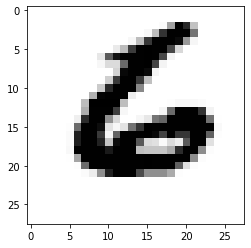

In [32]:
n = 9999

print('神經網路預測是:', result[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')